In [456]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
np.random.seed(22520834)

In [457]:
def f(x):
  return np.sin(1 + x**2)
def generate_Xy(N, sigma):
  X = np.random.uniform(0,1, N)
  e = np.random.normal(0, sigma, N)
  y = f(X) + e
  return X, y

def generate_datasets(N, sigma):
  x_train_D1, y_train_D1 = generate_Xy(N, sigma)
  x_test_D1, y_test_D1 = generate_Xy(N, sigma)

  x_train_D2, y_train_D2 = generate_Xy(N, sigma)
  x_test_D2, y_test_D2 = generate_Xy(N, sigma)

  x_train_D3, y_train_D3 = generate_Xy(N, sigma)
  x_test_D3, y_test_D3 = generate_Xy(N, sigma)
  return ((x_train_D1, y_train_D1), (x_test_D1, y_test_D1)), ((x_train_D2, y_train_D2), (x_test_D2, y_test_D2)), ((x_train_D3, y_train_D3), (x_test_D3, y_test_D3))
def plot_target_function(x, y, label):
  plt.plot(x, y, label= label)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Target signal function')

  plt.legend()
  plt.grid(True)

def plot_dataset_and_target_function(x, y, x_train, y_train, x_test, y_test, dataset_name = ''):
  plot_target_function(x, y, 'Target_function')
  plt.scatter(x_train, y_train, label= dataset_name + 'in-sample point', marker = 'o')
  plt.scatter(x_test, y_test, label = dataset_name + 'out-of-sample point', marker = 'x')
  plt.title('Target signal with in-sample and out-of-sample points')
  plt.legend()
  plt.grid(True)

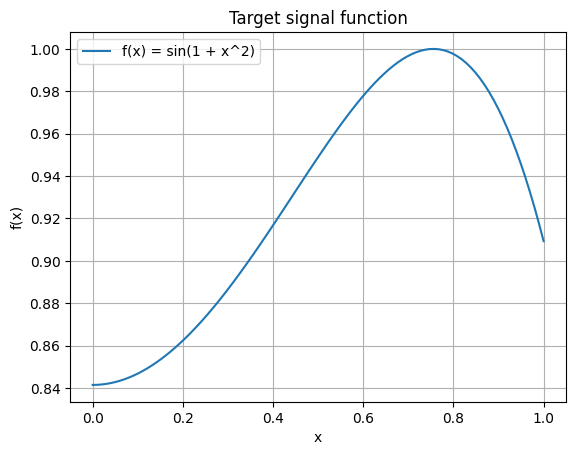

In [458]:
x = np.linspace(0,1, 100)
y = f(x)

plot_target_function(x, y, label = 'f(x) = sin(1 + x^2)')
plt.show()

**EXPERIMENT 1: N = 10**

In [459]:
D1, D2, D3 = generate_datasets(N = 10, sigma =  0.03)

train_D1, test_D1 = D1
train_D2, test_D2 = D2
train_D3, test_D3 = D3

x_train_D1, y_train_D1 = train_D1
x_test_D1, y_test_D1 = test_D1

x_train_D2, y_train_D2 = train_D2
x_test_D2, y_test_D2 = test_D2

x_train_D3, y_train_D3 = train_D3
x_test_D3, y_test_D3 = test_D3

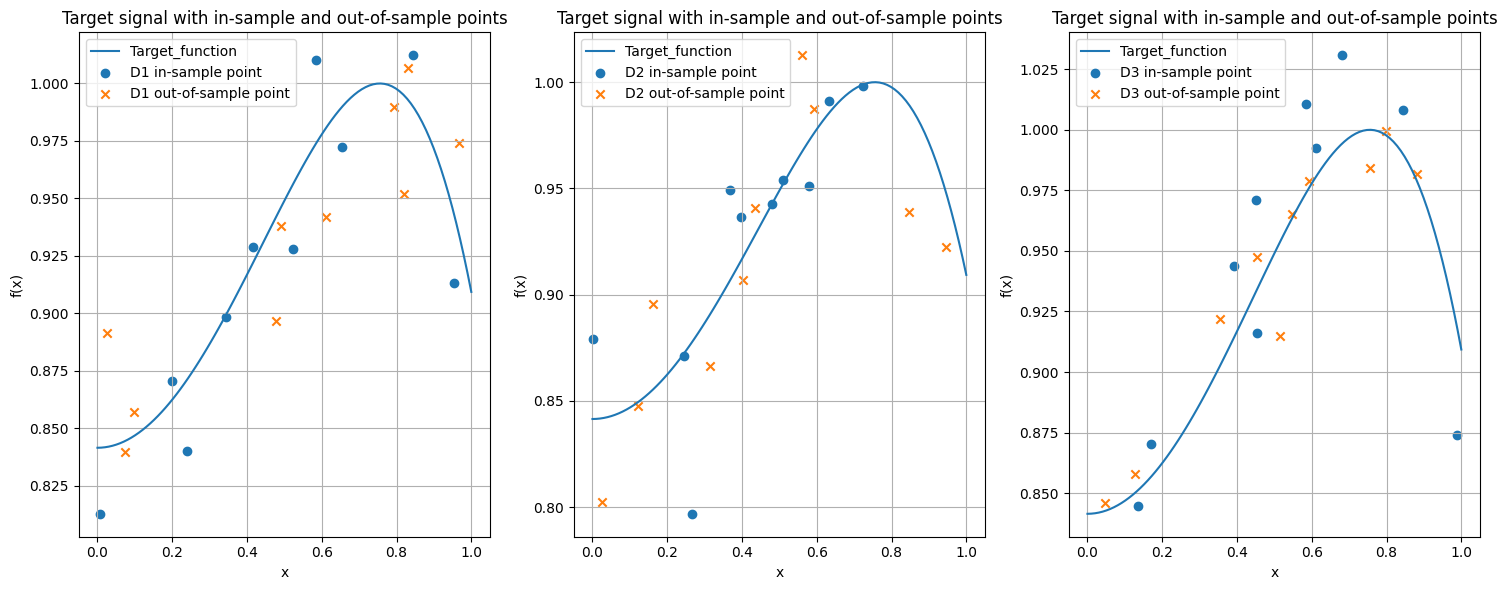

In [460]:
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plot_dataset_and_target_function(x, y, x_train_D1, y_train_D1, x_test_D1, y_test_D1, dataset_name = 'D1 ')

plt.subplot(1,3,2)
plot_dataset_and_target_function(x, y, x_train_D2, y_train_D2, x_test_D2, y_test_D2, dataset_name = 'D2 ')

plt.subplot(1,3,3)
plot_dataset_and_target_function(x, y, x_train_D3, y_train_D3, x_test_D3, y_test_D3, dataset_name = 'D3 ')

plt.tight_layout()
plt.show()

In [461]:
class PolynomialRegression:
  def __init(self):
    self.degree = None
  def fit(self, X, y, degree):
    self.degree = degree
    X = PolynomialFeatures(degree = degree).fit_transform(X.reshape(-1,1))
    self.model = LinearRegression()
    self.model.fit(X, y)
  def predict(self, X):
    X = PolynomialFeatures(degree = self.degree).fit_transform(X.reshape(-1,1))
    return self.model.predict(X)
  def plot_decision_boundary(self, plot_title= ''):
    plt.xlim(-0.1,1.1)
    plt.ylim(0.8,1.1)
    x = np.linspace (0, 1 , 100)
    y = self.predict(x)

    plt.plot(x, y, label= plot_title + ' decision boundary')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Degree ' + str(self.degree) + ' polynomial')
    plt.legend()
  def cost(self, x, y):
    y_pred = self.predict(x)
    mse = mean_squared_error(y, y_pred)
    return mse

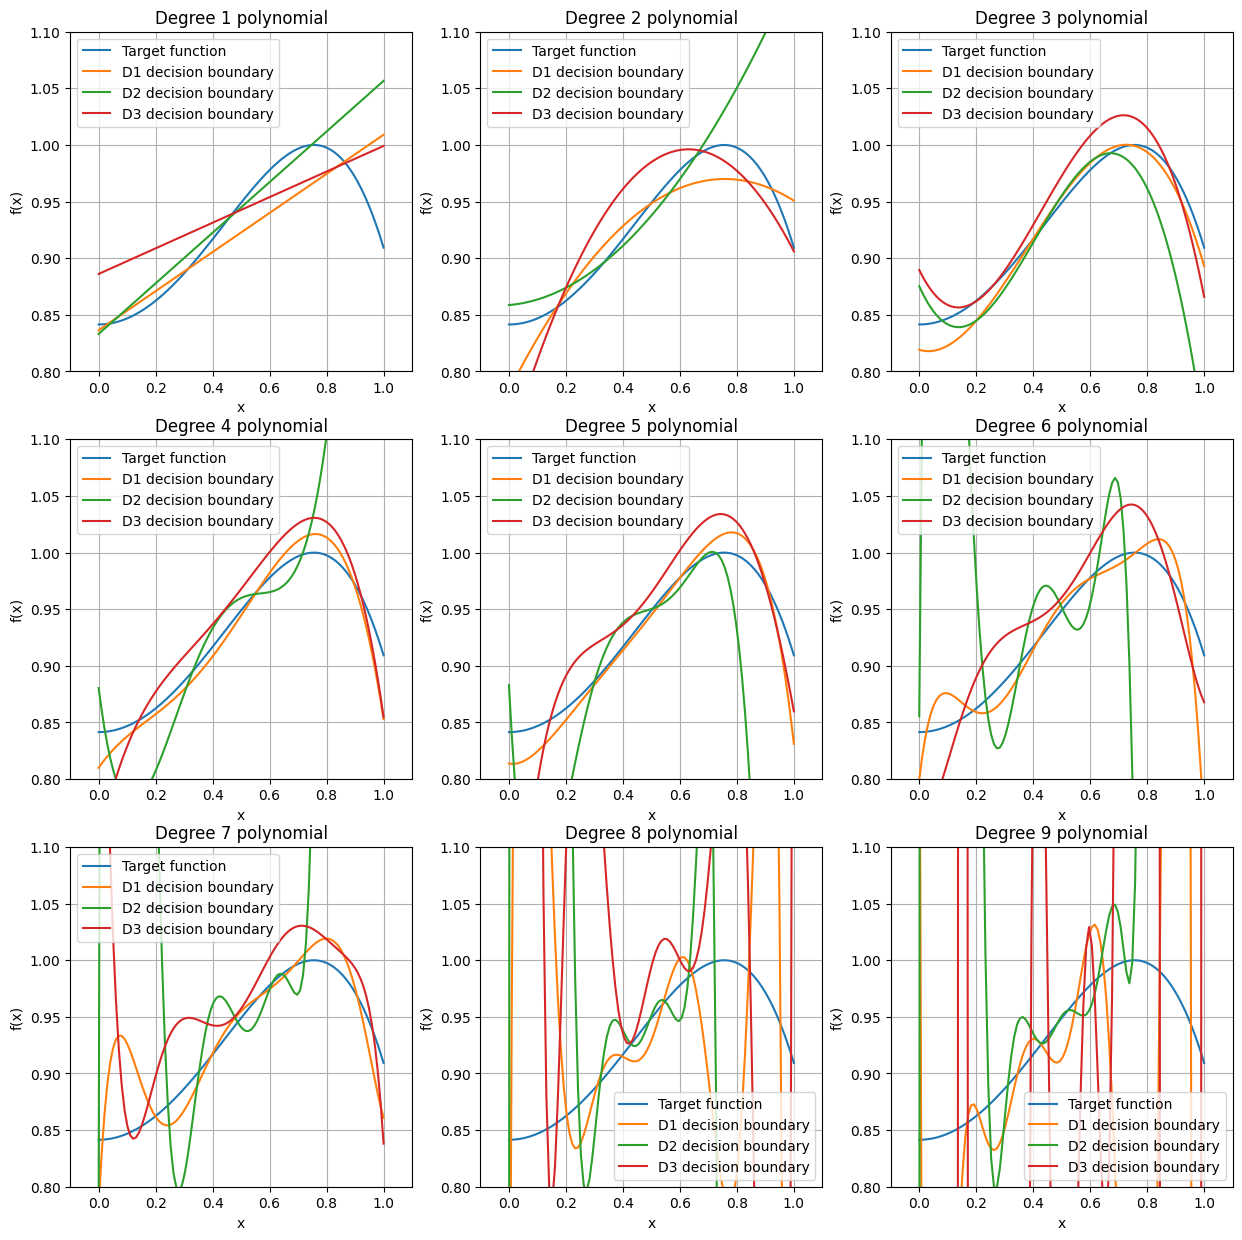

In [462]:
plt.figure(figsize = (15,15))

for i in range(1,10):
  plt.subplot(3, 3, i)
  plot_target_function(x, y, 'Target function')

  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  model.plot_decision_boundary('D1')

  model = PolynomialRegression()
  model.fit(x_train_D2, y_train_D2, i)
  model.plot_decision_boundary('D2')

  model = PolynomialRegression()
  model.fit(x_train_D3, y_train_D3, i)
  model.plot_decision_boundary('D3')

plt.show()


In [463]:
import pandas as pd

table = []
for i in range(1,10):
  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  Ein = model.cost(x_train_D1, y_train_D1)
  Eout = model.cost(x_test_D1, y_test_D1)
  table.append([i, Ein, Eout])

columns = ["Degree", "Ein", "Eout"]
df = pd.DataFrame(table, columns=columns)
print(df.to_markdown(index=False))

|   Degree |         Ein |        Eout |
|---------:|------------:|------------:|
|        1 | 0.00169712  | 0.000597052 |
|        2 | 0.000981952 | 0.00158829  |
|        3 | 0.000472778 | 0.00164746  |
|        4 | 0.000375033 | 0.00182693  |
|        5 | 0.000357599 | 0.00215478  |
|        6 | 0.000316377 | 0.00200918  |
|        7 | 0.000309745 | 0.00291288  |
|        8 | 0.000102632 | 0.187775    |
|        9 | 6.1126e-22  | 0.652522    |


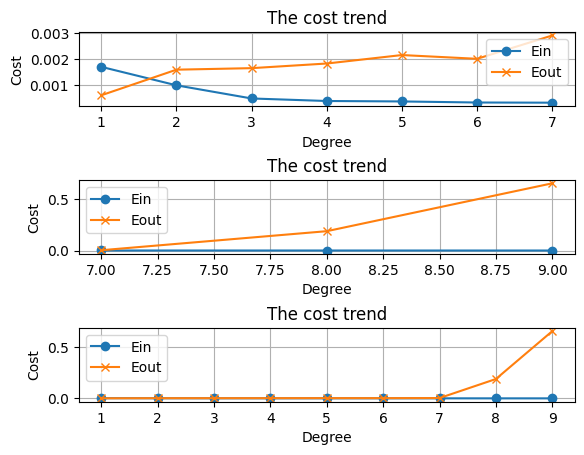

In [464]:
table = np.array(table)

plt.subplot(3,1,1)
plt.plot(table[:7, 0], table[:7, 1], label = 'Ein', marker = 'o')
plt.plot(table[:7, 0], table[:7, 2], label = 'Eout', marker = 'x')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(table[6:, 0], table[6:, 1], label = 'Ein', marker = 'o')
plt.plot(table[6:, 0], table[6:, 2], label = 'Eout', marker = 'x')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(table[:, 0], table[:, 1], label = 'Ein', marker = 'o')
plt.plot(table[:, 0], table[:, 2], label = 'Eout', marker = 'x')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.legend()
plt.grid(True)

plt.subplots_adjust(hspace=1)
plt.show()

**EXPERIMENT N = 100**

In [465]:
D1, D2, D3 = generate_datasets(N = 100, sigma =  0.03)

train_D1, test_D1 = D1
train_D2, test_D2 = D2
train_D3, test_D3 = D3

x_train_D1, y_train_D1 = train_D1
x_test_D1, y_test_D1 = test_D1

x_train_D2, y_train_D2 = train_D2
x_test_D2, y_test_D2 = test_D2

x_train_D3, y_train_D3 = train_D3
x_test_D3, y_test_D3 = test_D3

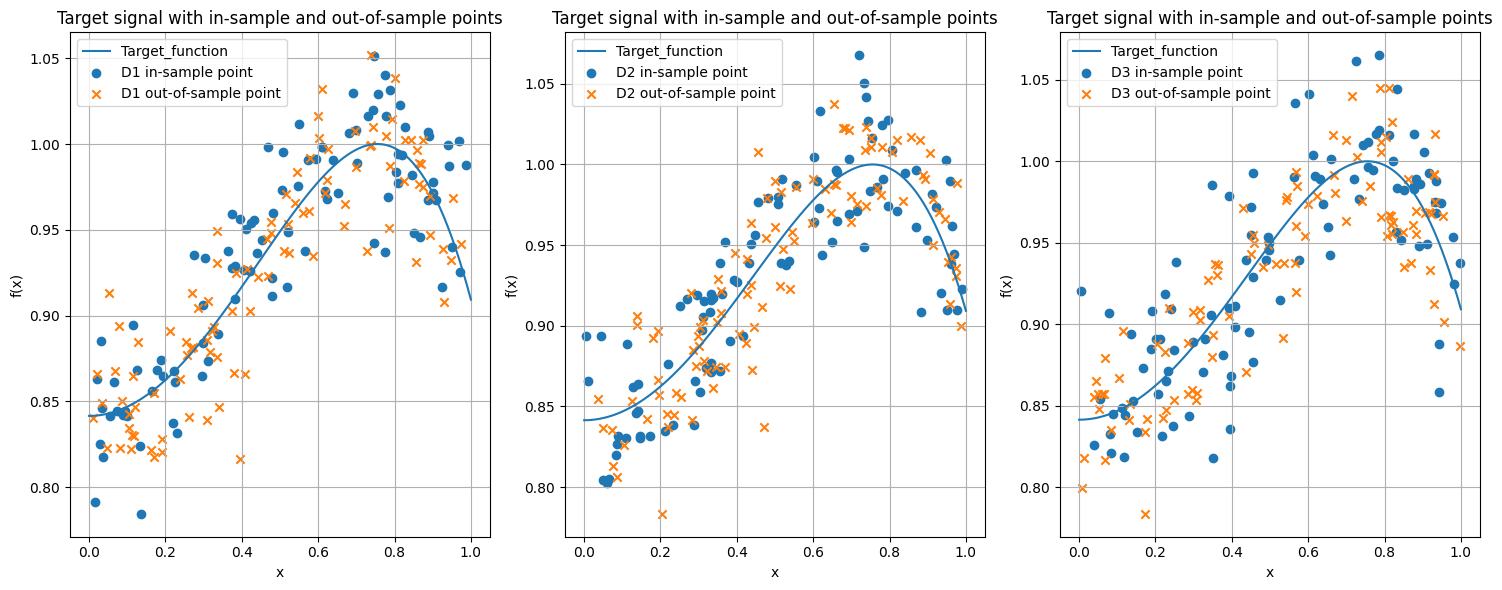

In [466]:
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plot_dataset_and_target_function(x, y, x_train_D1, y_train_D1, x_test_D1, y_test_D1, dataset_name = 'D1 ')

plt.subplot(1,3,2)
plot_dataset_and_target_function(x, y, x_train_D2, y_train_D2, x_test_D2, y_test_D2, dataset_name = 'D2 ')

plt.subplot(1,3,3)
plot_dataset_and_target_function(x, y, x_train_D3, y_train_D3, x_test_D3, y_test_D3, dataset_name = 'D3 ')

plt.tight_layout()
plt.show()

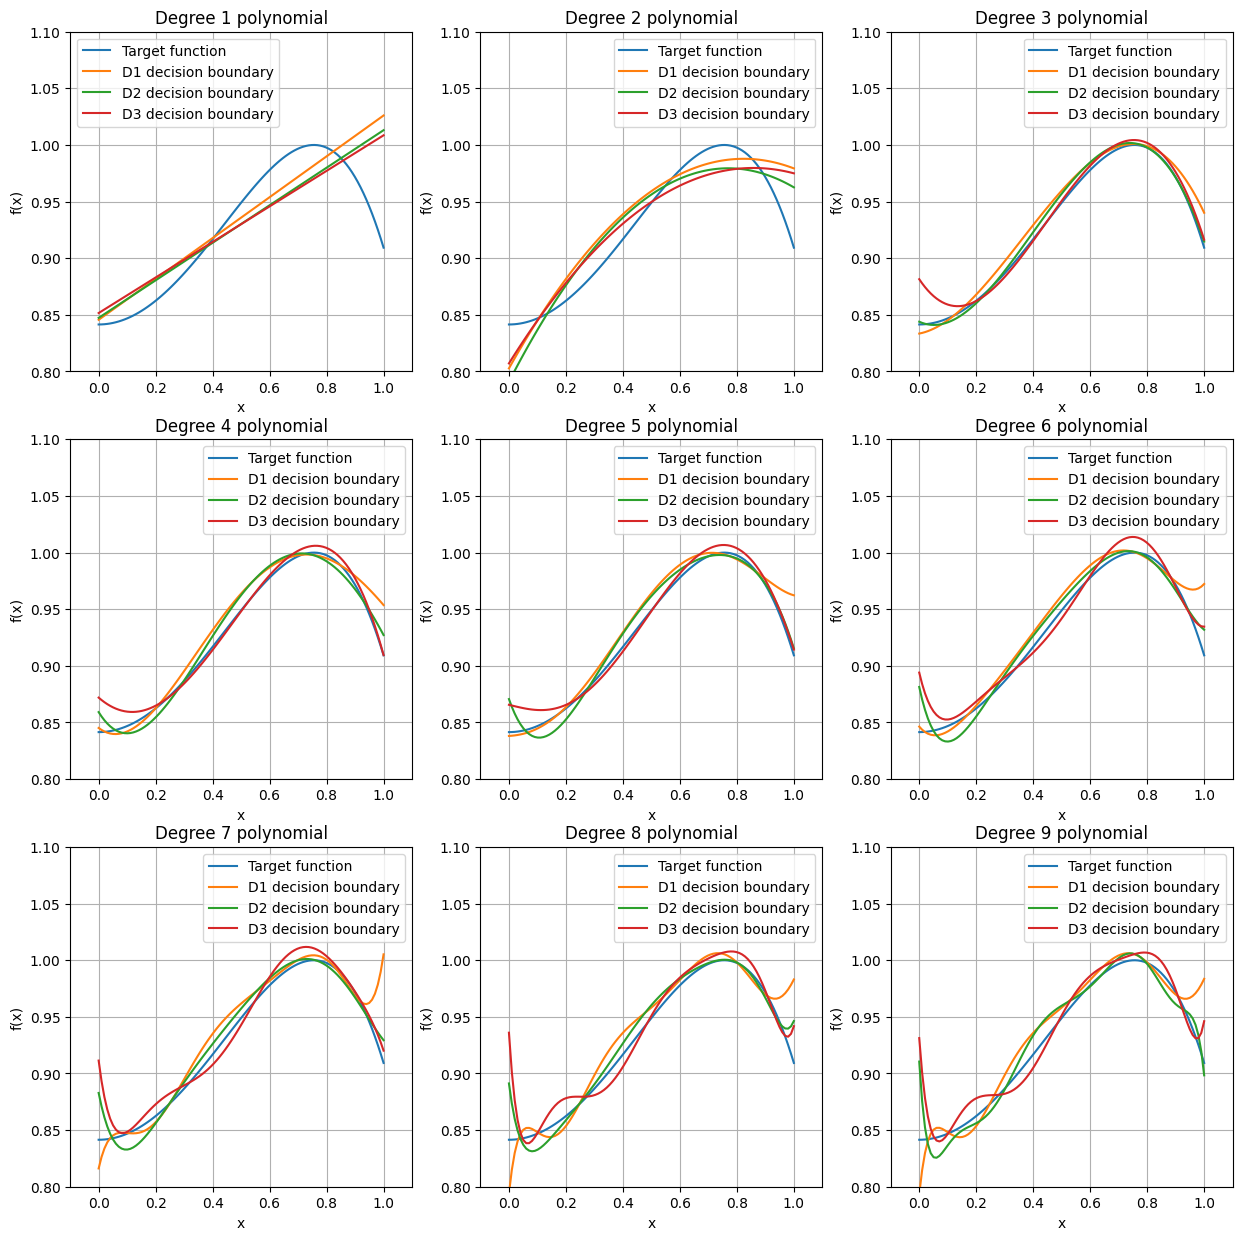

In [467]:
plt.figure(figsize = (15,15))

for i in range(1,10):
  plt.subplot(3, 3, i)
  plot_target_function(x, y, 'Target function')

  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  model.plot_decision_boundary('D1')

  model = PolynomialRegression()
  model.fit(x_train_D2, y_train_D2, i)
  model.plot_decision_boundary('D2')

  model = PolynomialRegression()
  model.fit(x_train_D3, y_train_D3, i)
  model.plot_decision_boundary('D3')

plt.show()


In [468]:
table = []
for i in range(1,10):
  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  Ein = model.cost(x_train_D1, y_train_D1)
  Eout = model.cost(x_test_D1, y_test_D1)
  table.append([i, Ein, Eout])

columns = ["Degree", "Ein", "Eout"]
df = pd.DataFrame(table, columns=columns)
print(df.to_markdown(index=False))

|   Degree |         Ein |        Eout |
|---------:|------------:|------------:|
|        1 | 0.00131046  | 0.00139815  |
|        2 | 0.000900446 | 0.00129344  |
|        3 | 0.000743657 | 0.000940921 |
|        4 | 0.000729674 | 0.000941542 |
|        5 | 0.000725987 | 0.000931016 |
|        6 | 0.000722601 | 0.000930504 |
|        7 | 0.000693977 | 0.000924557 |
|        8 | 0.000685025 | 0.000947064 |
|        9 | 0.000685022 | 0.00094652  |


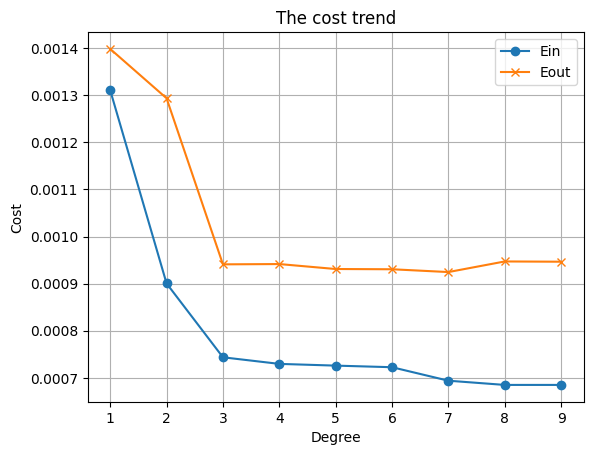

In [469]:
table = np.array(table)
plt.plot(table[:, 0], table[:, 1], label = 'Ein', marker = 'o')
plt.plot(table[:, 0], table[:, 2], label = 'Eout', marker = 'x')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.legend()
plt.grid(True)
plt.show()

**EXPERIMENT N = 1000**

In [470]:
D1, D2, D3 = generate_datasets(N = 1000, sigma =  0.03)

train_D1, test_D1 = D1
train_D2, test_D2 = D2
train_D3, test_D3 = D3

x_train_D1, y_train_D1 = train_D1
x_test_D1, y_test_D1 = test_D1

x_train_D2, y_train_D2 = train_D2
x_test_D2, y_test_D2 = test_D2

x_train_D3, y_train_D3 = train_D3
x_test_D3, y_test_D3 = test_D3

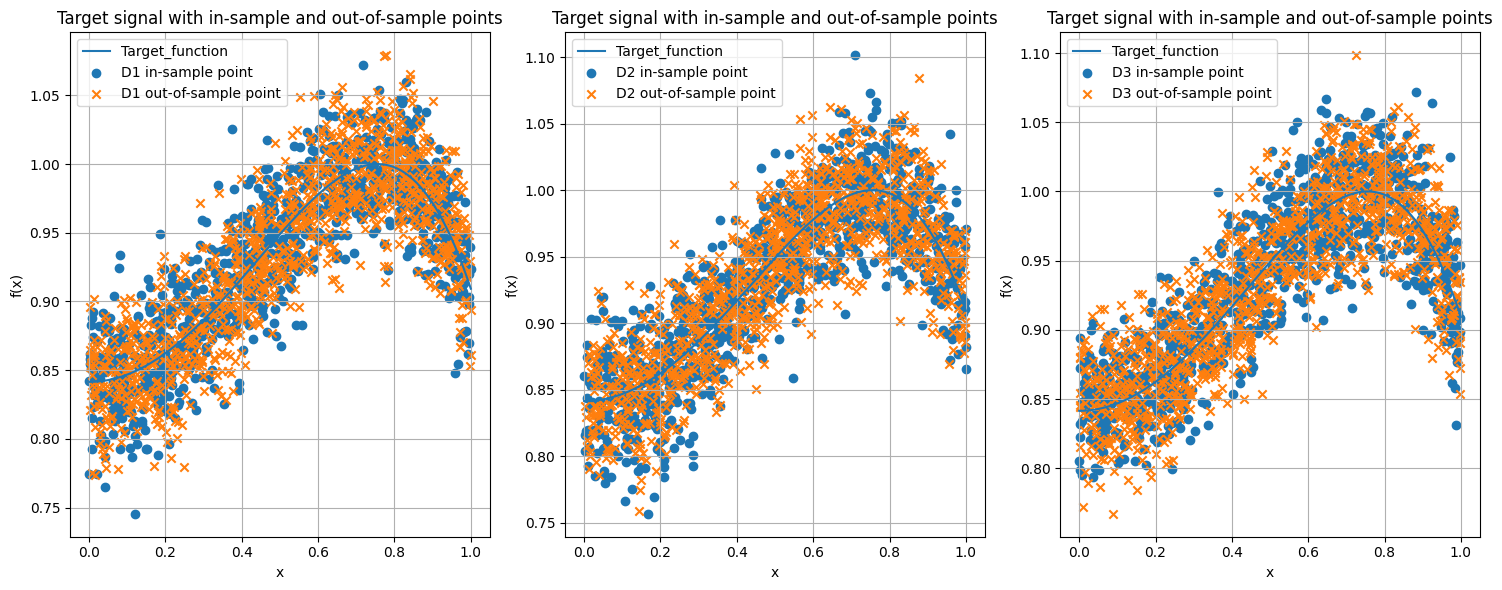

In [471]:
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plot_dataset_and_target_function(x, y, x_train_D1, y_train_D1, x_test_D1, y_test_D1, dataset_name = 'D1 ')

plt.subplot(1,3,2)
plot_dataset_and_target_function(x, y, x_train_D2, y_train_D2, x_test_D2, y_test_D2, dataset_name = 'D2 ')

plt.subplot(1,3,3)
plot_dataset_and_target_function(x, y, x_train_D3, y_train_D3, x_test_D3, y_test_D3, dataset_name = 'D3 ')

plt.tight_layout()
plt.show()

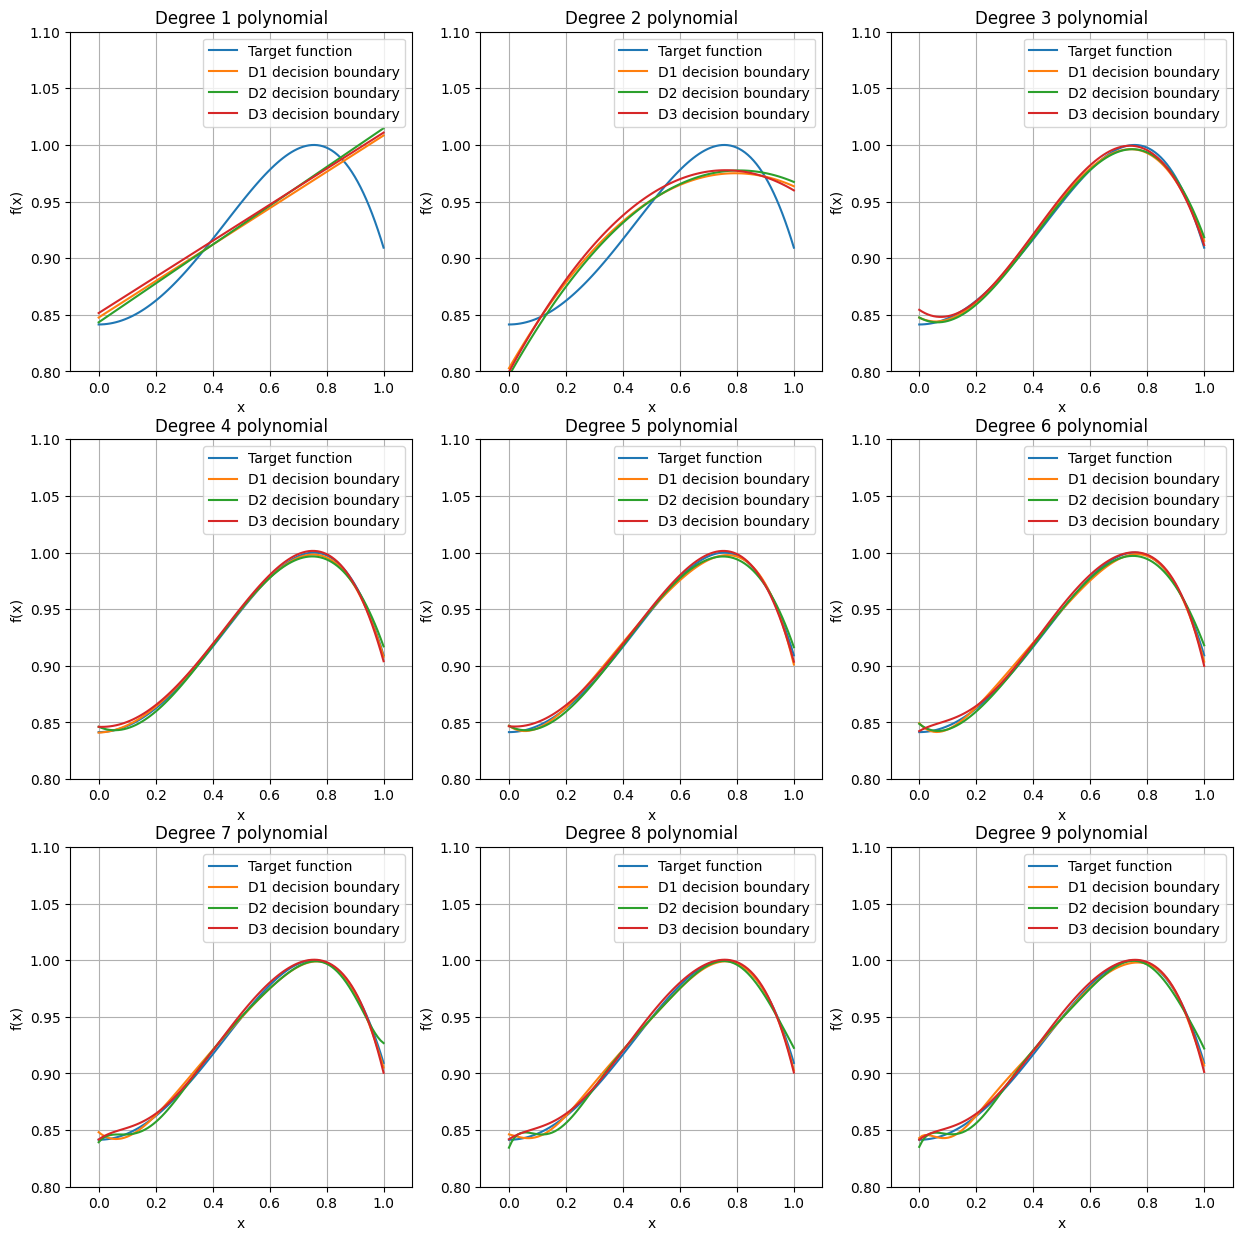

In [472]:
plt.figure(figsize = (15,15))

for i in range(1,10):
  plt.subplot(3, 3, i)
  plot_target_function(x, y, 'Target function')

  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  model.plot_decision_boundary('D1')

  model = PolynomialRegression()
  model.fit(x_train_D2, y_train_D2, i)
  model.plot_decision_boundary('D2')

  model = PolynomialRegression()
  model.fit(x_train_D3, y_train_D3, i)
  model.plot_decision_boundary('D3')

plt.show()


In [473]:
table = []
for i in range(1,10):
  model = PolynomialRegression()
  model.fit(x_train_D1, y_train_D1, i)
  Ein = model.cost(x_train_D1, y_train_D1)
  Eout = model.cost(x_test_D1, y_test_D1)
  table.append([i, Ein, Eout])

columns = ["Degree", "Ein", "Eout"]
df = pd.DataFrame(table, columns=columns)
print(df.to_markdown(index=False))

|   Degree |         Ein |        Eout |
|---------:|------------:|------------:|
|        1 | 0.00162526  | 0.00167727  |
|        2 | 0.00120126  | 0.00131406  |
|        3 | 0.000885078 | 0.000942594 |
|        4 | 0.000879641 | 0.000934367 |
|        5 | 0.000875666 | 0.000941784 |
|        6 | 0.000875195 | 0.000942824 |
|        7 | 0.000875059 | 0.000943242 |
|        8 | 0.000874763 | 0.000943858 |
|        9 | 0.000873994 | 0.000948156 |


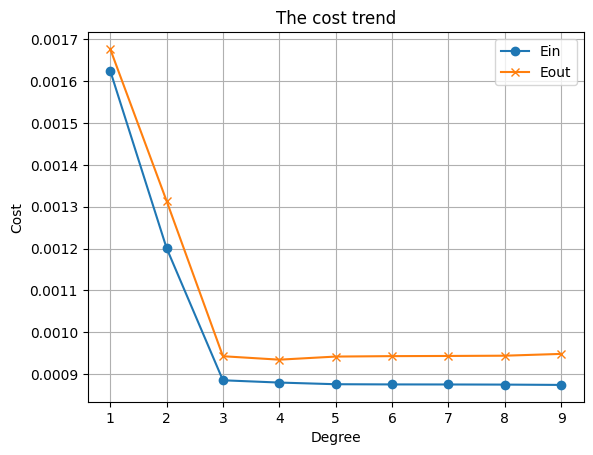

In [474]:
table = np.array(table)
plt.plot(table[:, 0], table[:, 1], label = 'Ein', marker = 'o')
plt.plot(table[:, 0], table[:, 2], label = 'Eout', marker = 'x')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.legend()
plt.grid(True)
plt.show()

**NHẬN XÉT**

1 và 2: Tăng độ phức tạp của mô hình có thể dẫn đến giảm bias, tuy nhiên điều đó lại có thể làm tăng variance, điều này có thể khiên mô hình bị overfitting.

3 và 4: Tăng kích thước tập train có thể làm tăng bias đôi chút nhưng bù vào đó ta có thể làm giảm varience đi đáng kể, từ đó tránh overfitting.

Từ đó có thể thấy: Cần cân nhắc đánh đổi giữa bias và variance để có mô hình tổng quát và hiệu quả trên dữ liệu mới.